<a href="https://colab.research.google.com/github/muhafidz-ahmad/mobile-price-prediction/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages Preparation

Mempersiapkan library yang akan digunakan

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data Collecting

## Import from Kaggle

Data yang akan digunakan untuk project ini adalah data dari [Kaggle](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv) tentang range harga suatu ponsel berdasarkan spesifikasi yang dimilikinya.

Data akan langsung di download langsung dari kaggle ke google colab.

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d iabhishekofficial/mobile-price-classification

rm: cannot remove '/root/.kaggle': No such file or directory
100% 70.6k/70.6k [00:00<00:00, 620kB/s]
100% 70.6k/70.6k [00:00<00:00, 619kB/s]


Setelah data telah berhasil diunduh, karena masih berbentuk zip, maka data zip tersebut diekstrak.

In [ ]:
!unzip /content/mobile-price-classification.zip -d /content/

Archive:  /content/mobile-price-classification.zip
  inflating: /content/test.csv       
  inflating: /content/train.csv      


## To Dataframe

In [ ]:
df = pd.read_csv('/content/train.csv')

df.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1717,1337,1,2.7,1,0,0,5,0.7,200,4,...,161,1029,3242,10,1,20,0,1,0,2
1550,1280,1,1.3,0,0,1,39,1.0,108,7,...,356,588,2335,6,4,2,1,0,1,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
1470,1576,1,2.0,0,0,1,20,0.6,148,3,...,410,1551,1379,17,1,16,1,0,1,1
292,1995,1,1.9,0,6,0,9,0.8,139,6,...,1830,1963,1203,14,12,18,1,1,1,2


Kode di bawah adalah untuk memeriksa informasi data secara umum, seperti jumlah data, jumlah kolom berserta nama-nama kolomnya dan tipe datanya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Exploratory Data Analysis

## Data Cleansing

Memeriksa kualitas data.
Pertama akan diperiksa apakah terdapat data yang hilang.

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Ternyata tidak ada data yang kosong.

Selanjutnya akan diperiksa apakah terdapat data duplikat.

In [ ]:
df.duplicated().sum()

0

Ternyata tidak ada data yang duplikat.

Sehingga data yang digunakan sudah cukup bersih.

### Outliers

Pertama akan difilter dulu kolom yang hanya memiliki sedikit nilai unik.

In [ ]:
def info(df):
  col_understanding = ['nama_kolom', 'tipe_data', 'null',
                       'nilai_unik', 'min', 'max']
  understanding_list = list()

  for i in df.columns:
    kolom = []
    kolom.append(i)
    kolom.append(df[i].dtype)
    kolom.append(df[i].isnull().sum())
    jumlah_nilai_unik = len(df[i].unique())
    kolom.append(jumlah_nilai_unik)
    if df[i].dtype != 'object' :
      kolom.append(df[i].min())
      kolom.append(df[i].max())
    else:
      kolom.append(0)
      kolom.append(0)

    understanding_list.append(kolom)

  return pd.DataFrame(understanding_list, columns=col_understanding)

info_df = info(df)
info_df

,nama_kolom,tipe_data,null,nilai_unik,min,max
0,battery_power,int64,0,1094,501.0,1998.0
1,blue,int64,0,2,0.0,1.0
2,clock_speed,float64,0,26,0.5,3.0
3,dual_sim,int64,0,2,0.0,1.0
4,fc,int64,0,20,0.0,19.0
5,four_g,int64,0,2,0.0,1.0
6,int_memory,int64,0,63,2.0,64.0
7,m_dep,float64,0,10,0.1,1.0
8,mobile_wt,int64,0,121,80.0,200.0
9,n_cores,int64,0,8,1.0,8.0


Kode di bawah adalah untuk memeriksa outliers menggunakan metode  IQR.

In [ ]:
col_under_5 = info_df[info_df.nilai_unik < 5]['nama_kolom']
df2 = df.copy()

q1 = df2.quantile(0.25, numeric_only=True)
q3 = df2.quantile(0.75, numeric_only=True)
iqr = q3 - q1

ul = q3+1.5*iqr   # upper limit
ll = q1-1.5*iqr   # lower limit

df2 = df2[(df2 >= ll) & (df2 <= ul)]

for col in col_under_5:
  df2[col] = df[col]

df2.isna().sum()

battery_power     0
blue              0
clock_speed       0
dual_sim          0
fc               18
four_g            0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
pc                0
px_height         2
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

Terdapat 2 outliers pada kolom px_height, dan 18 outliers pada kolom fc. Outliers tersebut akan dihapus.

In [ ]:
df2.dropna(inplace=True)
df2.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Univariate Analysis

Pertama akan dilihat analisis deskriptif dari kolom-kolom numerik dengan melihat nilai statistiknya.

In [ ]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,1980.0,1236.402020,439.568762,501.0,849.50,1224.0,1614.00,1998.0
blue,1980.0,0.494444,0.500095,0.0,0.00,0.0,1.00,1.0
clock_speed,1980.0,1.521162,0.817236,0.5,0.70,1.5,2.20,3.0
dual_sim,1980.0,0.509091,0.500044,0.0,0.00,1.0,1.00,1.0
fc,1980.0,4.189899,4.168422,0.0,1.00,3.0,7.00,16.0
four_g,1980.0,0.520707,0.499697,0.0,0.00,1.0,1.00,1.0
int_memory,1980.0,32.055051,18.126820,2.0,16.00,32.0,48.00,64.0
m_dep,1980.0,0.502222,0.288722,0.1,0.20,0.5,0.80,1.0
mobile_wt,1980.0,140.168182,35.385004,80.0,109.00,141.0,170.00,200.0
n_cores,1980.0,4.527273,2.291263,1.0,3.00,4.0,7.00,8.0


Kemudian akan dilihat histogram dari semua kolom dengan tipe data numerik.

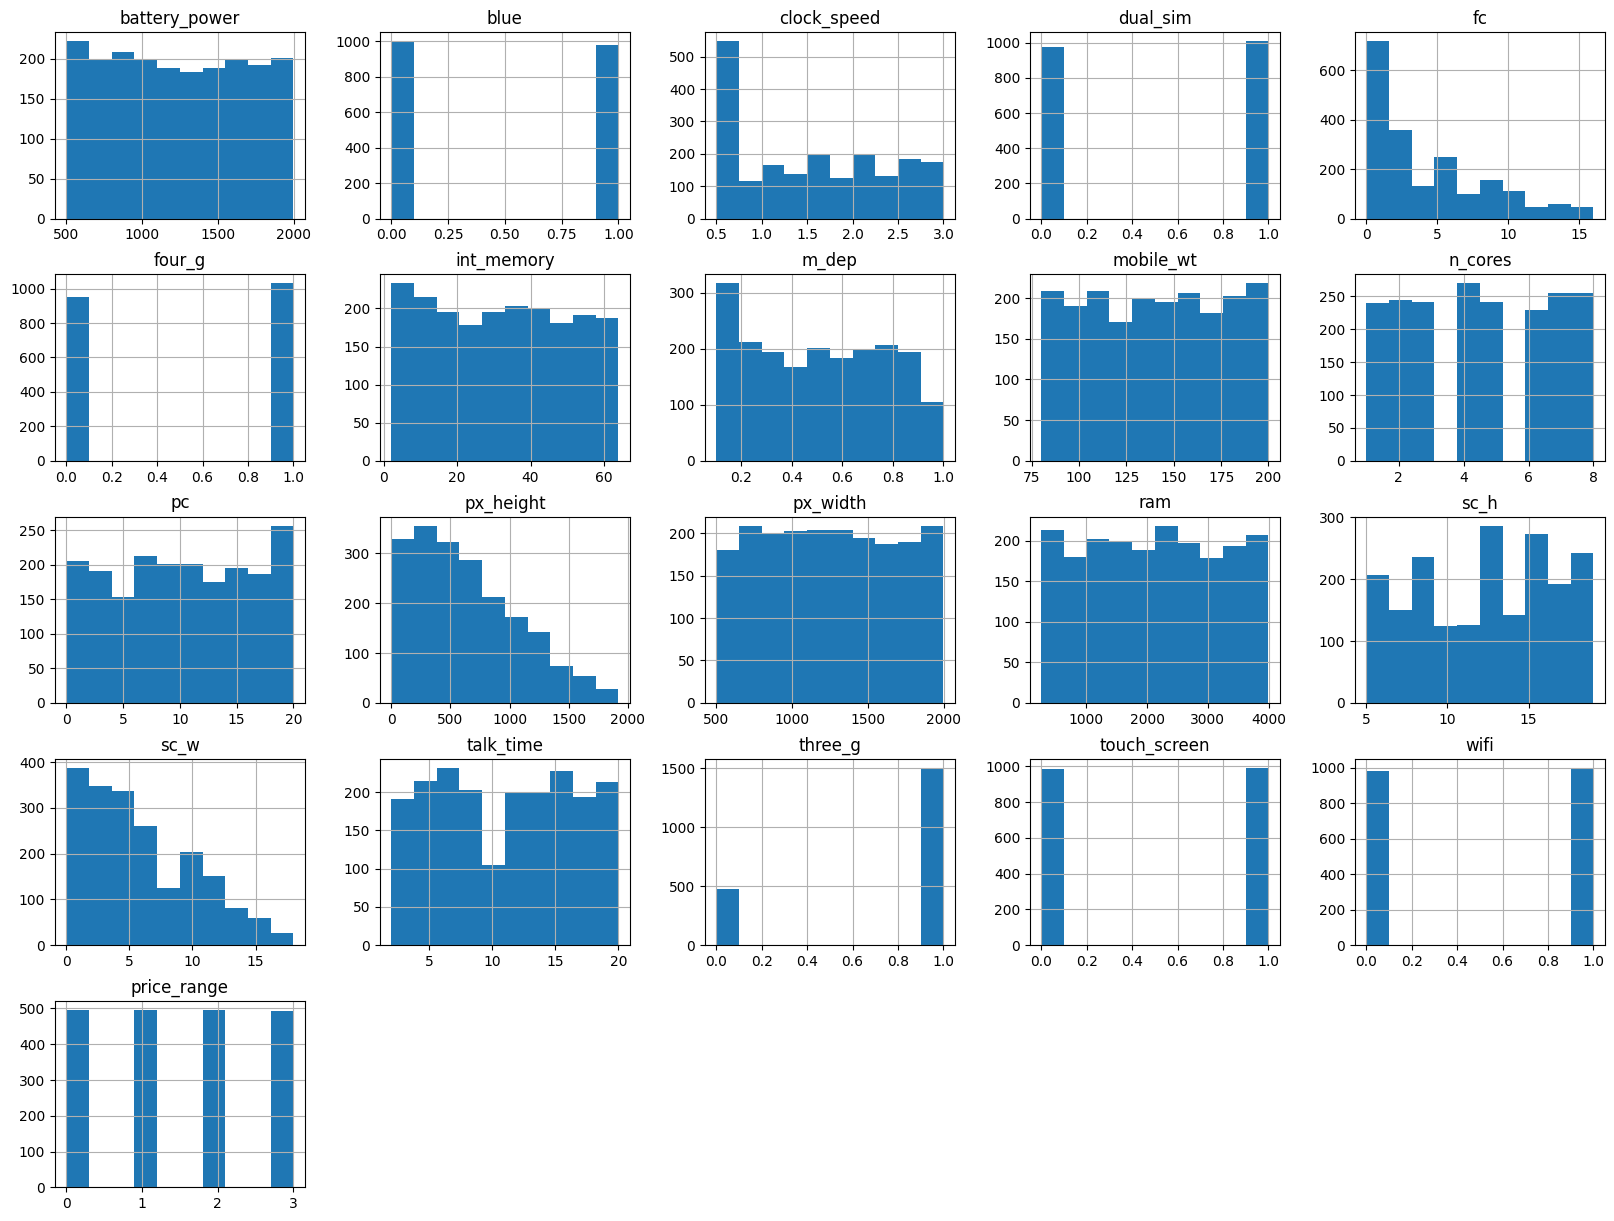

In [ ]:
df2.hist(figsize=(20,15))
plt.show()

Dari histogram bagian *price_range*, terlihat bahwa data sudah seimbang.

## Multivariate Analysis

### Korelasi

<Axes: >

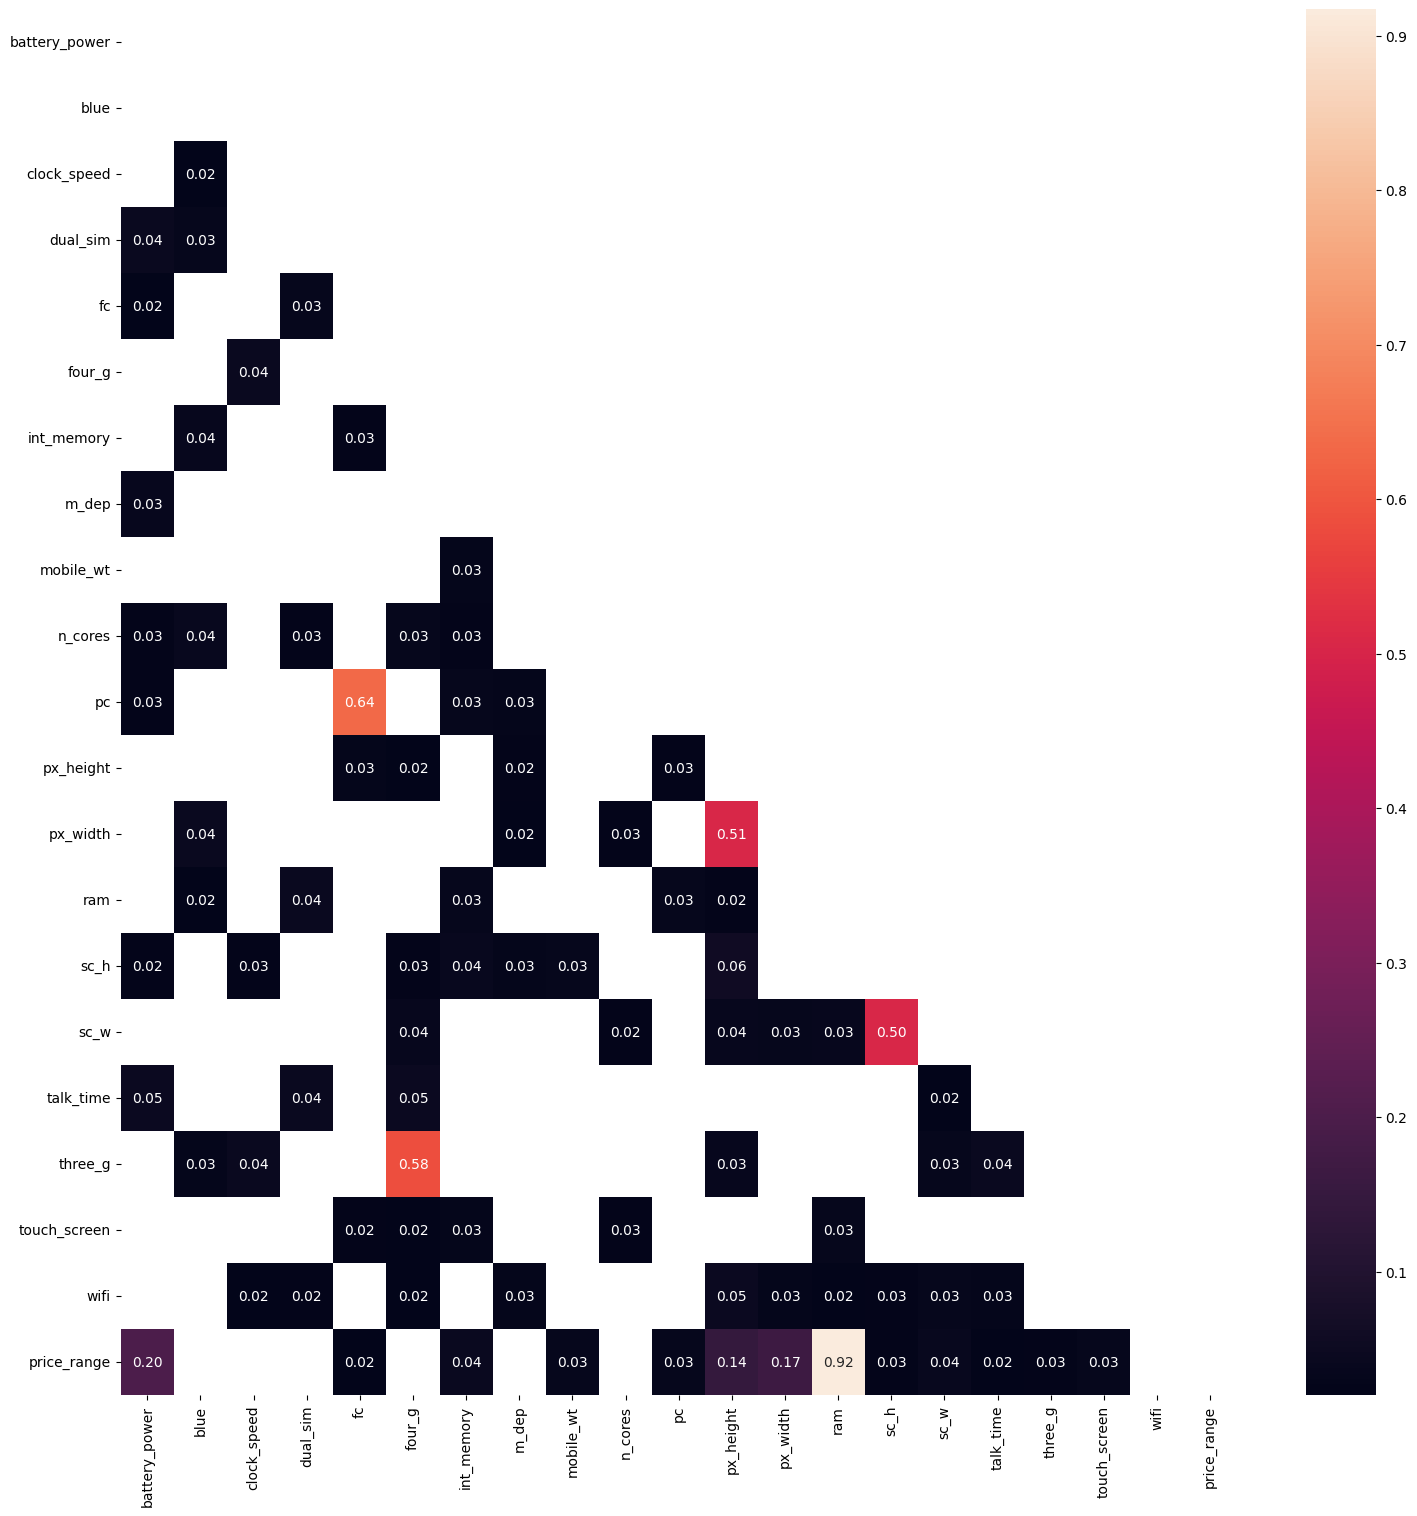

In [ ]:
corr = df2.corr().abs()
mask = np.tril(corr)
mask = ~((abs(mask) > 0.02) & (abs(mask) <= 0.99))

plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=True, mask=mask, fmt='.2f')

Kode di bawah adalah untuk melihat nilai korelasi seluruh kolom terhadap kolom harga (price_range)

In [ ]:
corr = df.corr()['price_range'].abs().sort_values(ascending=False)
corr

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64

Akan diambil kolom yang memiliki korelasi di atas threshold yang ditentukan (0.02)

In [ ]:
threshold = 0.01

colnames = corr[corr > threshold].index

df3 = df2[colnames]

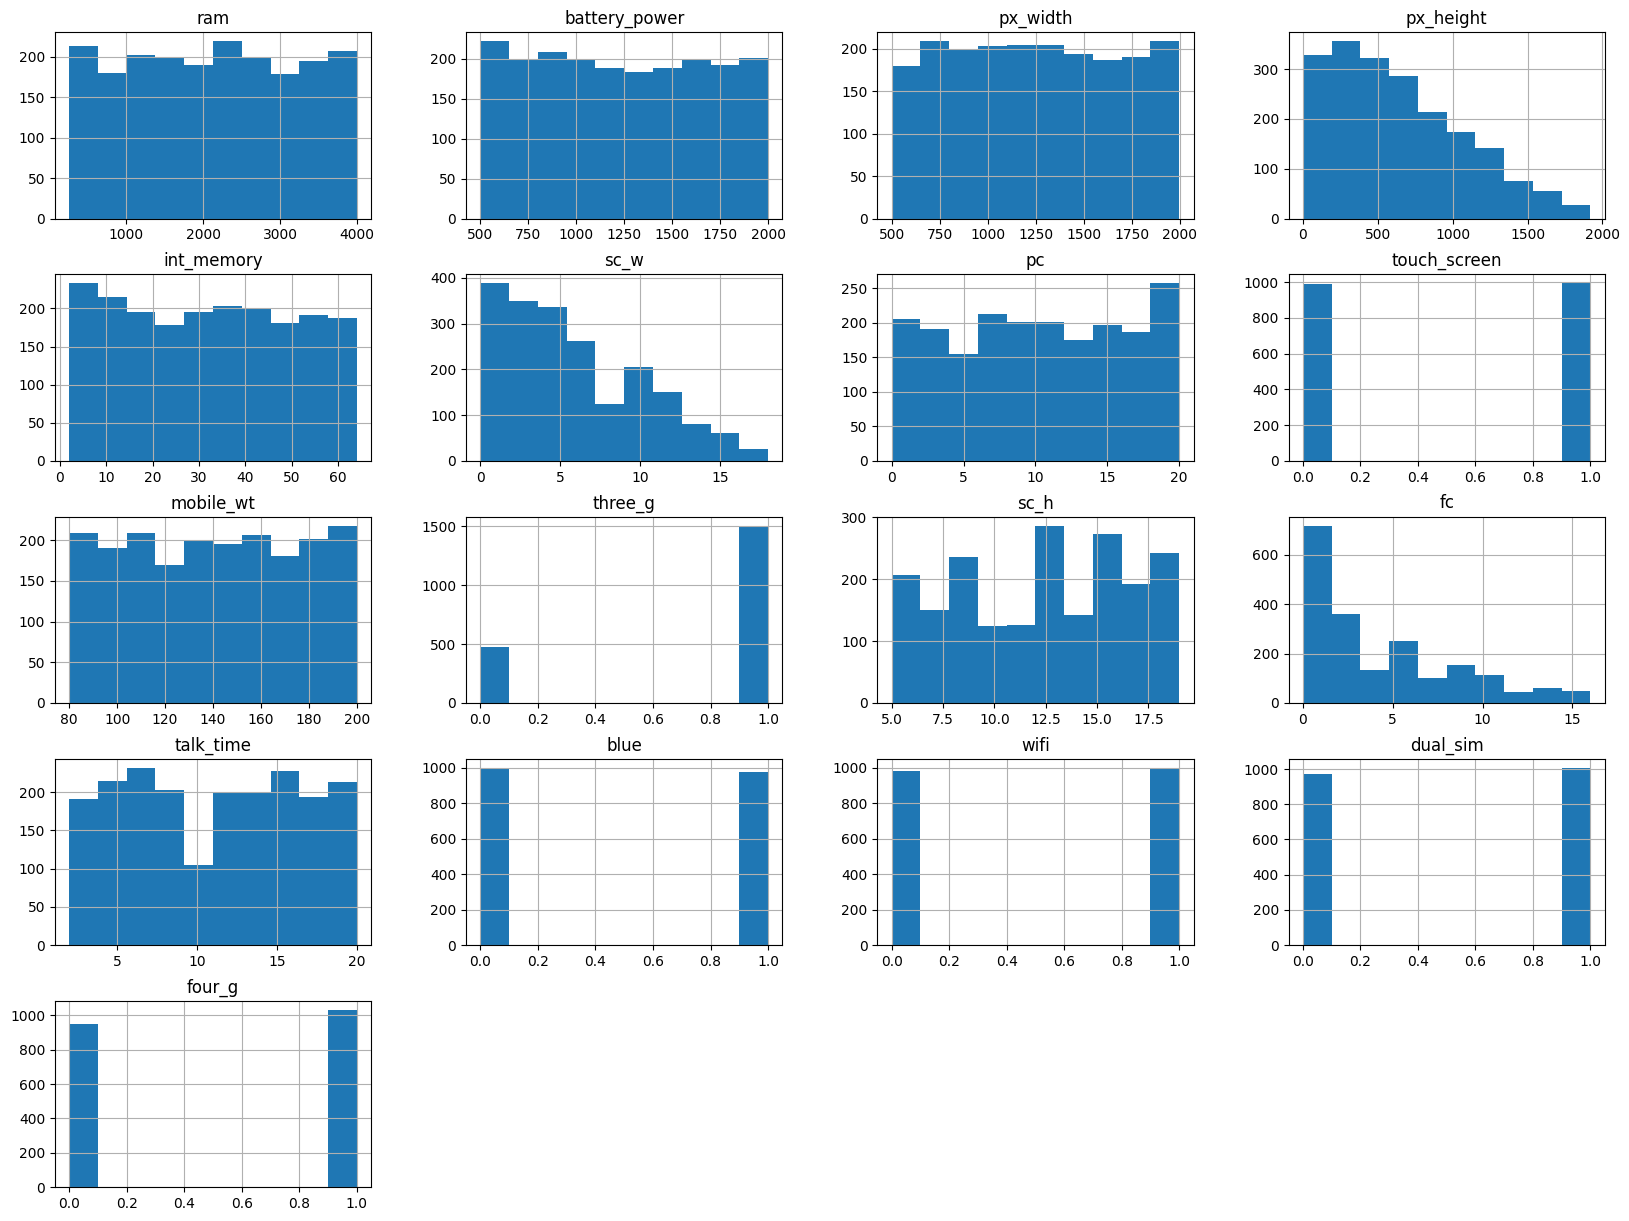

In [ ]:
df3.drop('price_range', axis=1).hist(figsize=(20,15))
plt.show()

# Data Preparation

## Standarisasi

In [ ]:
info_df = info(df3)
info_df

,nama_kolom,tipe_data,null,nilai_unik,min,max
0,price_range,int64,0,4,0.0,3.0
1,ram,int64,0,1546,256.0,3998.0
2,battery_power,int64,0,1092,501.0,1998.0
3,px_width,int64,0,1105,500.0,1998.0
4,px_height,float64,0,1130,0.0,1920.0
5,int_memory,int64,0,63,2.0,64.0
6,sc_w,int64,0,19,0.0,18.0
7,pc,int64,0,21,0.0,20.0
8,touch_screen,int64,0,2,0.0,1.0
9,mobile_wt,int64,0,121,80.0,200.0


In [ ]:
from sklearn.preprocessing import StandardScaler

col_filter = info_df[info_df['max'] > 1]['nama_kolom'][1:]

scaler = StandardScaler()
scaler.fit(df3[col_filter])

df4 = df3.copy()

df4[col_filter] = scaler.transform(df3.loc[:, col_filter])
df4.head()

,price_range,ram,battery_power,px_width,px_height,int_memory,sc_w,pc,touch_screen,mobile_wt,three_g,sc_h,fc,talk_time,blue,wifi,dual_sim,four_g
0,1,0.390916,-0.897474,-1.144030,-1.412273,-1.382558,0.281449,-1.301314,0,1.352095,0,-0.788136,-0.765447,1.465448,0,1,0,0
1,2,0.466543,-0.490154,1.711141,0.599791,1.155759,-0.636621,-0.637070,1,-0.117825,1,1.112895,-1.005406,-0.733696,1,0,1,1
2,2,0.440719,-1.532348,1.080779,1.413711,0.493590,-0.866139,-0.637070,1,0.136584,1,-0.312878,-0.525487,-0.367172,1,0,1,1
3,2,0.593816,-1.414020,1.243004,1.306855,-1.217016,0.510966,-0.138887,0,-0.259163,1,0.875266,-1.005406,-0.000648,1,0,0,0
4,1,-0.658625,1.330271,-0.087246,1.288667,0.659132,-0.866139,0.691417,1,0.023514,1,-1.025764,2.114068,0.732400,1,0,0,1


In [ ]:
df4.describe().transpose().round(4)

,count,mean,std,min,25%,50%,75%,max
price_range,1980.0,1.4980,1.1179,0.0000,0.0000,1.0000,2.0000,3.0000
ram,1980.0,0.0000,1.0003,-1.7238,-0.8442,0.0197,0.8682,1.7273
battery_power,1980.0,0.0000,1.0003,-1.6734,-0.8804,-0.0282,0.8592,1.7330
px_width,1980.0,-0.0000,1.0003,-1.7373,-0.8706,-0.0061,0.8797,1.7343
px_height,1980.0,-0.0000,1.0003,-1.4577,-0.8172,-0.1812,0.6839,2.9074
int_memory,1980.0,0.0000,1.0003,-1.6585,-0.8859,-0.0030,0.8799,1.7627
sc_w,1980.0,-0.0000,1.0003,-1.3252,-0.8661,-0.1776,0.7405,2.8061
pc,1980.0,0.0000,1.0003,-1.6334,-0.8031,0.0272,0.8575,1.6878
touch_screen,1980.0,0.5015,0.5001,0.0000,0.0000,1.0000,1.0000,1.0000
mobile_wt,1980.0,0.0000,1.0003,-1.7008,-0.8811,0.0235,0.8433,1.6913


## Feature and Target Splitting

In [ ]:
x_train = df4.drop('price_range', axis=1)
y_train = df4['price_range']

# Model Development

## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4]}

dt = tree.DecisionTreeClassifier()

gs_dt = GridSearchCV(dt, param_grid, cv=2, 
                     scoring='accuracy', verbose=0)

gs_dt.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4]},
             scoring='accuracy')

In [ ]:
print("Hasil dari GridSearchCV " )
print("\nEstimator terbaik:\n",gs_dt.best_estimator_)
print("\nSkor terbaik:\n",gs_dt.best_score_)
print("\nParameter terbaik:\n",gs_dt.best_params_)

Hasil dari GridSearchCV 

Estimator terbaik:
 DecisionTreeClassifier(max_depth=4)

Skor terbaik:
 0.8035353535353535

Parameter terbaik:
 {'criterion': 'gini', 'max_depth': 4}


In [ ]:
print(classification_report(y_train, gs_dt.predict(x_train)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       496
           1       0.83      0.70      0.76       495
           2       0.72      0.80      0.76       496
           3       0.89      0.88      0.89       493

    accuracy                           0.83      1980
   macro avg       0.83      0.83      0.83      1980
weighted avg       0.83      0.83      0.83      1980



## SVM

In [ ]:
from sklearn.svm import SVC

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [1, 3, 5]}

svm = SVC()

gs_svm = GridSearchCV(svm, param_grid, cv=2, 
                       scoring='accuracy', verbose=0)

gs_svm.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 3, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
print("Hasil dari GridSearchCV " )
print("\nEstimator terbaik:\n",gs_svm.best_estimator_)
print("\nSkor terbaik:\n",gs_svm.best_score_)
print("\nParameter terbaik:\n",gs_svm.best_params_)

Hasil dari GridSearchCV 

Estimator terbaik:
 SVC(C=5, kernel='linear')

Skor terbaik:
 0.9656565656565657

Parameter terbaik:
 {'C': 5, 'kernel': 'linear'}


In [ ]:
print(classification_report(y_train, gs_svm.predict(x_train)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       496
           1       0.98      0.97      0.97       495
           2       0.97      0.97      0.97       496
           3       0.98      0.99      0.98       493

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980

